In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('./Data/Loan2.csv')

In [2]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [3]:
df.shape

(30000, 24)

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64


In [5]:
# Fill missing values for categorical columns
df['Gender'] = df['Gender'].fillna('Rather not say')
df['Type of Employment'] = df['Type of Employment'].fillna('Unknown')
df['Has Active Credit Card'] = df['Has Active Credit Card'].fillna('Unknown')

# Fill missing values for numerical columns with the median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income (USD)'] = df['Income (USD)'].fillna(df['Income (USD)'].median())
df['Loan Amount Request (USD)'] = df['Loan Amount Request (USD)'].fillna(df['Loan Amount Request (USD)'].median())
df['Current Loan Expenses (USD)'] = df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].median())
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
df['Property Age'] = df['Property Age'].fillna(df['Property Age'].median())
df['Property Price'] = df['Property Price'].fillna(df['Property Price'].median())
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].fillna(df['Loan Sanction Amount (USD)'].median())


In [6]:
# Check for duplicates based on 'Customer ID'
duplicates = df.duplicated(subset='Customer ID').sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [7]:
# Remove duplicates based on 'Customer ID'
df = df.drop_duplicates(subset='Customer ID')


In [8]:
df = df.drop(columns=['Customer ID'])

In [9]:
# Ensure correct data types
df['Age'] = df['Age'].astype(int)
df['Income (USD)'] = df['Income (USD)'].astype(float)
df['Loan Amount Request (USD)'] = df['Loan Amount Request (USD)'].astype(float)
df['Current Loan Expenses (USD)'] = df['Current Loan Expenses (USD)'].astype(float)
df['Credit Score'] = df['Credit Score'].astype(float)
df['Property Age'] = df['Property Age'].astype(float)
df['Property Price'] = df['Property Price'].astype(float)
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].astype(float)


In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         30000 non-null  object 
 1   Gender                       30000 non-null  object 
 2   Age                          30000 non-null  int64  
 3   Income (USD)                 30000 non-null  float64
 4   Income Stability             28317 non-null  object 
 5   Profession                   30000 non-null  object 
 6   Type of Employment           30000 non-null  object 
 7   Location                     30000 non-null  object 
 8   Loan Amount Request (USD)    30000 non-null  float64
 9   Current Loan Expenses (USD)  30000 non-null  float64
 10  Expense Type 1               30000 non-null  object 
 11  Expense Type 2               30000 non-null  object 
 12  Dependents                   27507 non-null  float64
 13  Credit Score    

In [11]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Income Stability'] = le.fit_transform(df['Income Stability'])
# df['Profession'] = le.fit_transform(df['Profession'])
# df['Type of Employment'] = le.fit_transform(df['Type of Employment'])
# df['Location'] = le.fit_transform(df['Location'])
# df['Has Active Credit Card'] = le.fit_transform(df['Has Active Credit Card'])
df['Property Type'] = le.fit_transform(df['Property Type'])
# df['Property Location'] = le.fit_transform(df['Property Location'])
df['Co-Applicant'] = df['Co-Applicant'].astype(int)

In [12]:
df.head(15)

,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,Frederica Shealy,0,56,1933.050,1,Working,Sales staff,Semi-Urban,72809.58,241.08,...,809.44,0,Unknown,746,1933.05,3,Rural,1,119933.46,54607.18
1,America Calderone,1,32,4952.910,1,Working,Unknown,Semi-Urban,46837.47,495.81,...,780.40,0,Unpossessed,608,4952.91,1,Rural,1,54791.00,37469.98
2,Rosetta Verne,0,65,988.190,0,Pensioner,Unknown,Semi-Urban,45593.04,171.95,...,833.15,0,Unpossessed,546,988.19,1,Urban,0,72440.58,36474.43
3,Zoe Chitty,0,65,2222.435,0,Pensioner,Unknown,Rural,80057.92,298.54,...,832.70,1,Unpossessed,890,2223.25,1,Semi-Urban,1,121441.51,56040.54
4,Afton Venema,0,31,2614.770,1,Working,High skill tech staff,Semi-Urban,113858.89,491.41,...,745.55,1,Active,715,2614.77,3,Semi-Urban,1,208567.91,74008.28
5,Polly Crumpler,0,60,1234.920,1,State servant,Secretaries,Rural,34434.72,181.48,...,684.12,1,Inactive,491,1234.92,1,Rural,1,43146.82,22382.57
6,Nathalie Olivier,1,43,2361.560,1,Working,Laborers,Semi-Urban,152561.34,697.67,...,637.29,0,Unpossessed,227,2361.56,0,Semi-Urban,1,221050.80,0.00
7,Clarinda Montana,0,45,2222.435,1,State servant,Managers,Semi-Urban,240311.77,807.64,...,812.26,0,Active,314,2223.25,1,Urban,1,401040.70,168218.24
8,Kenny Ankrom,0,38,1296.070,1,Working,Cooking staff,Rural,35141.99,155.95,...,705.29,1,Active,241,1296.07,3,Rural,1,54903.44,22842.29
9,Barbie Goetsch,1,18,1546.170,1,Working,Laborers,Rural,42091.29,500.20,...,613.24,0,Unpossessed,883,1546.17,1,Urban,1,67993.43,0.00


In [13]:
print(df.describe())

             Gender           Age  Income (USD)  Income Stability  \
count  30000.000000  30000.000000  3.000000e+04      30000.000000   
mean       0.505300     40.092300  2.568320e+03          0.970567   
std        0.503501     16.045129  1.036924e+04          0.375196   
min        0.000000     18.000000  3.777000e+02          0.000000   
25%        0.000000     25.000000  1.743305e+03          1.000000   
50%        1.000000     40.000000  2.222435e+03          1.000000   
75%        1.000000     55.000000  2.869142e+03          1.000000   
max        2.000000     65.000000  1.777460e+06          2.000000   

       Loan Amount Request (USD)  Current Loan Expenses (USD)    Dependents  \
count               30000.000000                 30000.000000  27507.000000   
mean                88826.333855                   400.789347      2.253027   
std                 59536.949605                   241.856859      0.951162   
min                  6048.240000                  -999.000000 

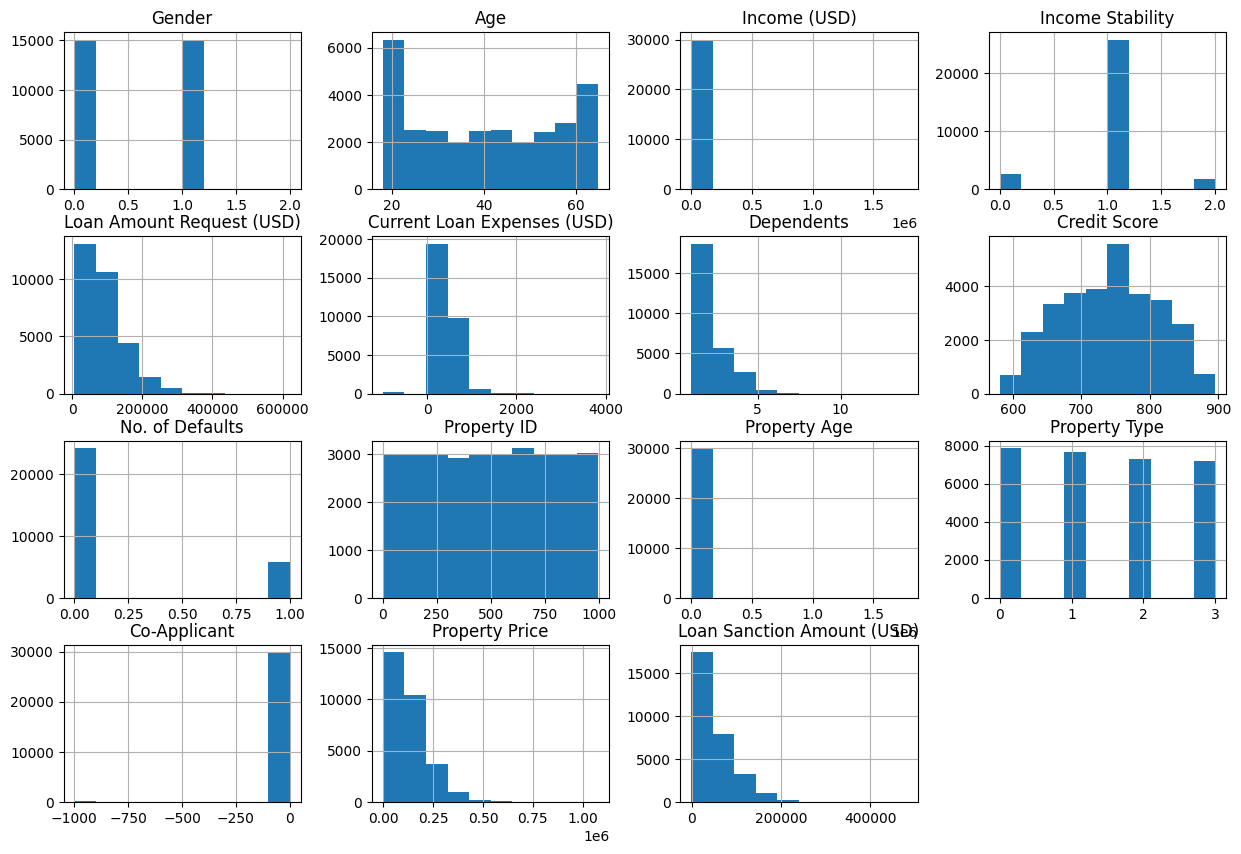

In [14]:
df.hist(figsize=(15, 10))
plt.show()